### Feature Preparation

** Feature extraction **

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('labeledTrainData.tsv', sep='\t')

In [3]:
train_data['Review_Length']=train_data.review.apply(len)

In [4]:
train_data.head()

,id,sentiment,review,Review_Length
0,5814_8,1,With all this stuff going down at the moment w...,2302
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2455
3,3630_4,0,It must be assumed that those who praised this...,2245
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2233


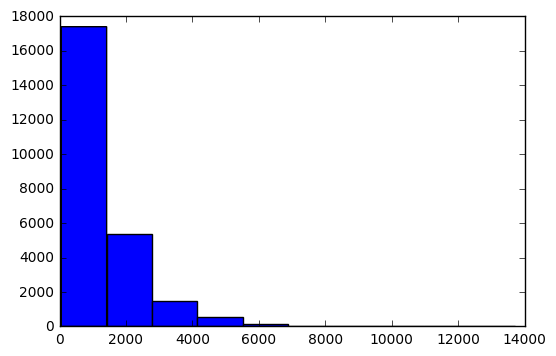

In [34]:
p=plt.hist(train_data.Review_Length.values)

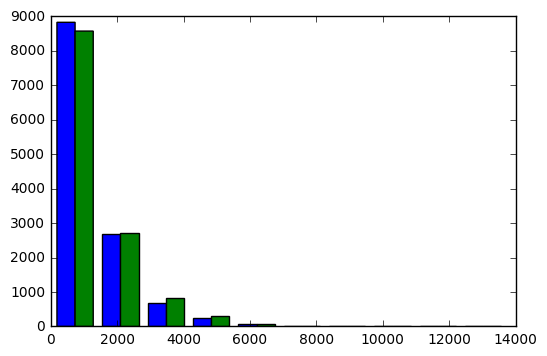

In [6]:
p=plt.hist([train_data[train_data.sentiment==0].Review_Length.values, 
            train_data[train_data.sentiment==1].Review_Length.values],label=['Negative','Positive'])

In [7]:
# Negative Reviews
train_data.loc[train_data.sentiment==0, :].describe()

,sentiment,Review_Length
count,12500,12500.000000
mean,0,1305.942240
std,0,959.400711
min,0,52.000000
25%,0,711.000000
50%,0,978.500000
75%,0,1570.000000
max,0,8999.000000


In [8]:
# Positive Reviews
train_data.loc[train_data.sentiment==1].describe()

,sentiment,Review_Length
count,12500,12500.000000
mean,1,1349.965440
std,0,1049.249815
min,1,70.000000
25%,1,695.000000
50%,1,984.000000
75%,1,1654.000000
max,1,13708.000000


In [9]:
train_data.loc[train_data.Review_Length==52].review.all()

'This movie is terrible but it has some good effects.'

### Word Extractions

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vocab=['awesome','terrible']

In [37]:
simple_vectorizer=CountVectorizer(vocabulary=vocab)
bow=simple_vectorizer.fit_transform(train_data.review).todense()

In [39]:
bow

matrix([[0, 0],
        [0, 0],
        [0, 0],
        ..., 
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64)

In [14]:
words=list(simple_vectorizer.vocabulary_.keys())

In [15]:
words

['awesome', 'terrible']

In [40]:
# convert bow to DataFrame
bow_df=pd.DataFrame(bow, index=train_data.index , columns=words)
bow_df

,awesome,terrible
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [17]:
# how many review r(eview have neither word
bow_df[(bow_df.awesome==0) & (bow_df.terrible==0)].count()

awesome     23276
terrible    23276
dtype: int64

In [18]:
# joining with training data
df=train_data.join(bow_df)

In [19]:
df.head(10)

,id,sentiment,review,Review_Length,awesome,terrible
0,5814_8,1,With all this stuff going down at the moment w...,2302,0,0
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,0,0
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2455,0,0
3,3630_4,0,It must be assumed that those who praised this...,2245,0,0
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2233,0,0
5,8196_8,1,I dont know why people think this is such a ba...,441,0,0
6,7166_2,0,"This movie could have been very good, but come...",605,0,0
7,10633_1,0,I watched this video at a friend's house. I'm ...,728,0,0
8,319_1,0,"A friend of mine bought this film for £1, and ...",964,0,0
9,8713_10,1,<br /><br />This movie is full of references. ...,245,0,0


In [42]:
df[(df.sentiment==1) & (df.terrible>0)].count()

id               217
sentiment        217
review           217
Review_Length    217
awesome          217
terrible         217
dtype: int64

In [21]:
df[(df.sentiment==0) & (df.awesome>0)].count()

id               111
sentiment        111
review           111
Review_Length    111
awesome          111
terrible         111
dtype: int64

In [22]:
# now expand the vocab
vocab_expand=['aweosme','interesting','good','nice','terrible','amazing']

In [46]:
expand_vectorizer=CountVectorizer(vocabulary=vocab_expand)
expand_bow=expand_vectorizer.fit_transform(train_data.review).todense()

In [47]:
expand_bow

matrix([[0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ..., 
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64)

In [25]:
words_expand=list(expand_vectorizer.vocabulary_.keys())

In [26]:
words_expand

['amazing', 'good', 'aweosme', 'interesting', 'terrible', 'nice']

In [27]:
# convert expand_bow to DataFrame
df_expand_bow=pd.DataFrame(expand_bow,index=train_data.index,columns=words_expand)

In [28]:
df_expand_bow.head(10)

,amazing,good,aweosme,interesting,terrible,nice
0,0,0,0,2,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0
5,0,0,3,0,0,0
6,0,0,1,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [29]:
s=df_expand_bow.apply(sum,axis=1)

In [30]:
s[:10]

0    2
1    0
2    0
3    1
4    0
5    3
6    1
7    0
8    0
9    0
dtype: int64

In [31]:
# join df_expand_bow to train_data
train_data_expand=train_data.join(df_expand_bow)

In [32]:
train_data_expand.head(20)

,id,sentiment,review,Review_Length,amazing,good,aweosme,interesting,terrible,nice
0,5814_8,1,With all this stuff going down at the moment w...,2302,0,0,0,2,0,0
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,0,0,0,0,0,0
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2455,0,0,0,0,0,0
3,3630_4,0,It must be assumed that those who praised this...,2245,0,0,1,0,0,0
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2233,0,0,0,0,0,0
5,8196_8,1,I dont know why people think this is such a ba...,441,0,0,3,0,0,0
6,7166_2,0,"This movie could have been very good, but come...",605,0,0,1,0,0,0
7,10633_1,0,I watched this video at a friend's house. I'm ...,728,0,0,0,0,0,0
8,319_1,0,"A friend of mine bought this film for £1, and ...",964,0,0,0,0,0,0
9,8713_10,1,<br /><br />This movie is full of references. ...,245,0,0,0,0,0,0


In [33]:
# store file
train_data_expand.to_csv('trainDataFeatures.tsv', sep='\t')